# Anomaly detection

Anomaly detection, also known as outlier detection or novelty detection, is a process of identifying patterns in data that do not conform to expected behavior. In other words, it aims to **detect observations** that deviate significantly **from the norm or the majority of the data points**. Anomalies may indicate errors in the data, interesting events, or potential threats such as fraud, network intrusions, or equipment failures.

Methods for Anomaly Detection:

- Distance-Based Methods: These methods measure the distance of each data point from its neighbors or from a reference set of normal data points. Common distance metrics include Euclidean distance and Mahalanobis distance.

- Density-Based Methods: These methods identify anomalies as data points that lie in low-density regions of the data space. They typically estimate the density of data points and flag those with significantly lower densities as anomalies.

- Model-Based Methods: These methods model the distribution of normal data and identify anomalies as data points that have low probability under the model. Gaussian Mixture Models and Autoencoders are commonly used for model-based anomaly detection.

- Isolation Forest: This method builds an ensemble of decision trees and isolates anomalies by identifying data points that require fewer steps to isolate.

- Local Outlier Factor (LOF): This method computes a score reflecting the degree of abnormality of each data point relative to its neighbors. Data points with significantly lower scores are considered anomalies.

Industrial Examples of Anomaly Detection:

Manufacturing Industry: Anomaly detection can be used to identify **defective** products on production lines by monitoring sensor data such as temperature, pressure, and vibration. Anomalies may indicate machine malfunctions or process errors.

Energy Industry: In power plants, anomaly detection can help identify  **equipment failures or abnormalities in energy consumption patterns**. This enables proactive maintenance and optimization of energy usage.

Supply Chain Management: Anomaly detection can detect **unusual patterns** in **logistics data**, such as unexpected **delays in shipments** or irregularities in **inventory** levels. This helps prevent disruptions and ensure smooth operations.

Medical Examples of Anomaly Detection:

Health Monitoring: Anomaly detection can be applied to patient health data to detect abnormal **vital signs**, irregular heartbeats, or unusual patterns in medical imaging. This assists in early disease diagnosis and patient monitoring.

Fraud Detection in Healthcare Claims: Anomaly detection techniques can identify **fraudulent insurance claims** by detecting **unusual billing patterns**, such as duplicate claims, excessive billing, or billing for services not rendered.

Drug Discovery: Anomaly detection can help identify **rare adverse drug** **reactions or unexpected drug interactions** by analyzing large-scale biological and chemical data.

Fraud Detection Examples:

Financial Transactions: Anomaly detection is widely used in banking and finance to identify fraudulent transactions, such as credit card fraud, money laundering, or insider trading. **Unusual patterns in transaction amounts**, frequencies, or locations may indicate fraudulent activity.

Cybersecurity: Anomaly detection techniques are used to detect        **suspicious activities or intrusions in computer networks**, such as    **unusual access** patterns, data breaches, or malware infections.

E-commerce: Anomaly detection helps identify fraudulent activities on e-commerce platforms, such as fake product reviews, account takeovers, or fraudulent orders.

Overall, anomaly detection plays a crucial role in various industries and domains by providing early detection of abnormal events or behaviors, thereby enabling timely intervention and decision-making.

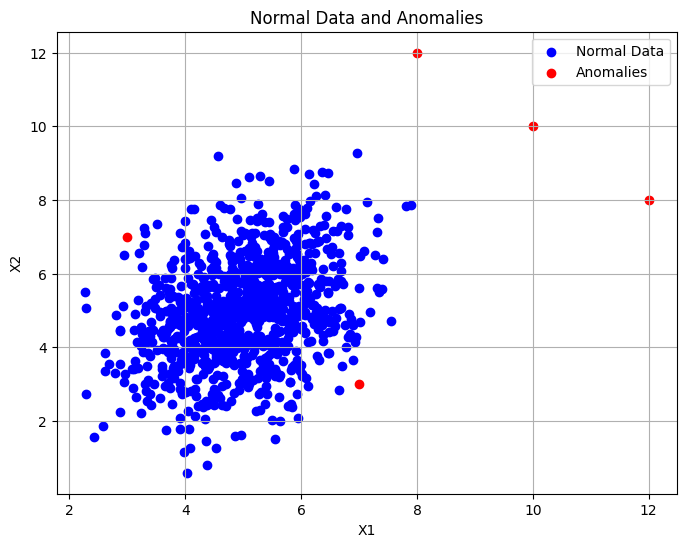

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(0)

# Generate normal data
normal_data = np.random.multivariate_normal(mean=[5, 5], cov=[[1, 0.5], [0.5, 2]], size=1000)

# Generate anomalies
anomalies = np.array([[10, 10], [8, 12], [12, 8], [3, 7], [7, 3]])

# Concatenate normal data and anomalies
data = np.vstack([normal_data, anomalies])

# Plot normal data and anomalies
plt.figure(figsize=(8, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='b', label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', label='Anomalies')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Normal Data and Anomalies')
plt.legend()
plt.grid(True)
plt.show()


# detect anomalies using the Gaussian distribution

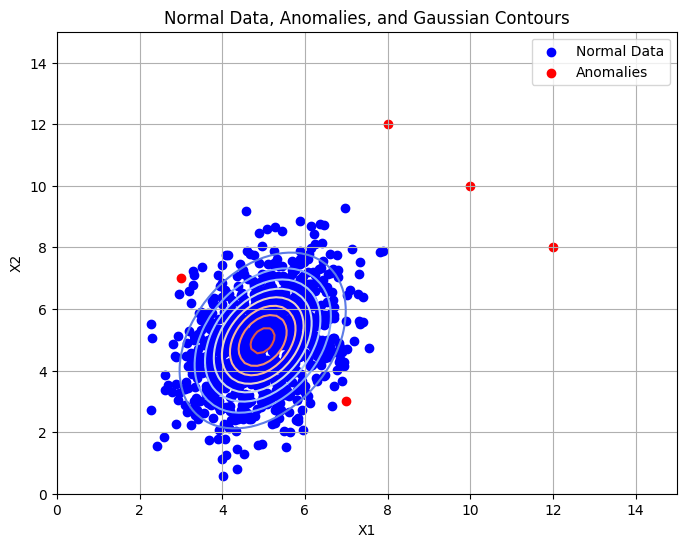

In [2]:
# Fit Gaussian distribution to normal data
mu, sigma = np.mean(normal_data, axis=0), np.cov(normal_data.T)

# Create a grid of points
x, y = np.meshgrid(np.linspace(0, 15, 100), np.linspace(0, 15, 100))
pos = np.dstack((x, y))

# Create Gaussian distribution
rv = multivariate_normal(mu, sigma)

# Plot normal data, anomalies, and Gaussian contours
plt.figure(figsize=(8, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='b', label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', label='Anomalies')
plt.contour(x, y, rv.pdf(pos), levels=10, cmap='coolwarm')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Normal Data, Anomalies, and Gaussian Contours')
plt.legend()
plt.grid(True)
plt.show()


 you can use anomaly detection algorithms to assign anomaly scores to each data point, which can help you understand the importance or severity of the anomalies relative to the normal data. Here are some common methods for scoring anomalies:

**Distance-Based Methods**:

- Mahalanobis Distance: This method calculates the distance of each data point from the centroid of the normal data distribution, considering the covariance matrix of the features. Points with larger Mahalanobis distances are considered more anomalous.


- Euclidean Distance: Similar to Mahalanobis distance but without considering the covariance matrix. It measures the straight-line distance between each point and a reference point (e.g., centroid or mean) of the normal data.


**Density-Based Methods**:

- Local Outlier Factor (LOF): LOF measures the density of a data point relative to its neighbors. Points with lower densities compared to their neighbors are considered more anomalous.

- Isolation Forest: This algorithm isolates anomalies by randomly selecting features and splitting the data until individual data points are isolated. Anomalies require fewer splits to be isolated, so they have shorter paths in the trees.


**Model-Based Methods**:

- Gaussian Mixture Models (GMM): This method models the data distribution as a mixture of multiple Gaussian distributions. Data points with low probability densities under the model are considered anomalous.

- Autoencoders: Autoencoders are neural networks trained to reconstruct input data. Anomalies result in higher reconstruction errors, which can be used as anomaly scores.

Once you have computed anomaly scores for each data point, you can rank them based on their scores to understand their relative importance. Points with higher scores are typically considered more anomalous. You can also visualize the anomalies along with their scores to gain insights into their distribution and severity.

Here's a general approach to implement anomaly detection and score ranking:

Choose an appropriate anomaly detection algorithm based on your data characteristics and requirements.

- Train the algorithm on the normal data to learn the underlying patterns.

- Use the trained model to predict anomaly scores for both normal and anomalous data points.

- Rank the data points based on their anomaly scores.

- Visualize the anomalies and their scores to analyze their distribution and importance.



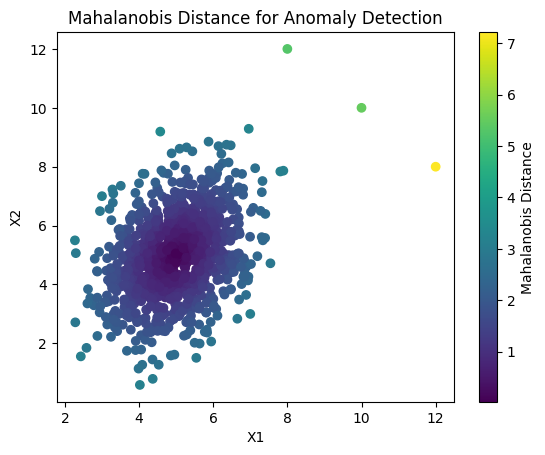

In [3]:
# Distance-Based Method (Mahalanobis Distance)

import numpy as np
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate normal data
normal_data = np.random.multivariate_normal(mean=[5, 5], cov=[[1, 0.5], [0.5, 2]], size=1000)

# Generate anomalies
anomalies = np.array([[10, 10], [8, 12], [12, 8], [3, 7], [7, 3]])

# Concatenate normal data and anomalies
data = np.vstack([normal_data, anomalies])

# Compute the Mahalanobis distance for each data point
def mahalanobis_distance(data, mean, covariance):
    distances = []
    inv_covariance = np.linalg.inv(covariance)
    for point in data:
        distances.append(mahalanobis(point, mean, inv_covariance))
    return distances

# Compute mean and covariance matrix for normal data
mean_normal = np.mean(normal_data, axis=0)
covariance_normal = np.cov(normal_data.T)

# Compute Mahalanobis distances for all data points
distances = mahalanobis_distance(data, mean_normal, covariance_normal)

# Plot the data along with Mahalanobis distances
plt.scatter(data[:, 0], data[:, 1], c=distances, cmap='viridis')
plt.colorbar(label='Mahalanobis Distance')
plt.title('Mahalanobis Distance for Anomaly Detection')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


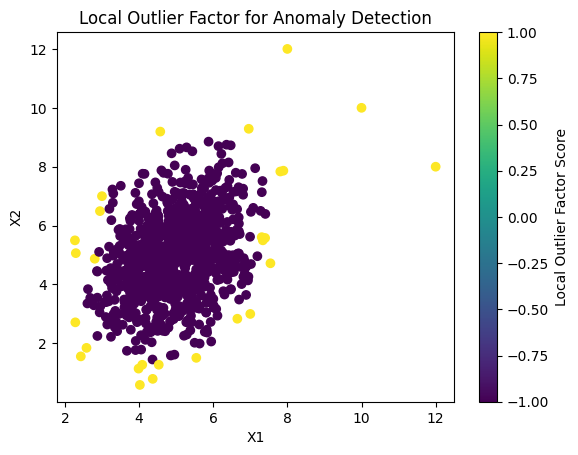

In [4]:
# Density-Based Method (Local Outlier Factor):


from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Fit Local Outlier Factor
lof = LocalOutlierFactor()
lof_scores = lof.fit_predict(data)

# Plot the data along with Local Outlier Factor scores
plt.scatter(data[:, 0], data[:, 1], c=-lof_scores, cmap='viridis')
plt.colorbar(label='Local Outlier Factor Score')
plt.title('Local Outlier Factor for Anomaly Detection')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


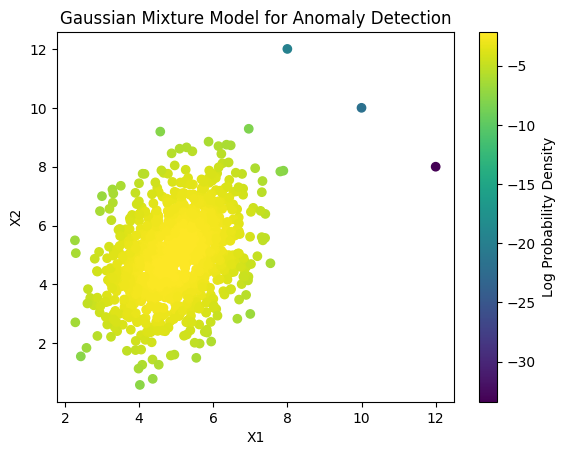

In [5]:
# Model-Based Method (Gaussian Mixture Models):

from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)
gmm.fit(normal_data)

# Compute probability densities for all data points
densities = gmm.score_samples(data)

# Plot the data along with probability densities
plt.scatter(data[:, 0], data[:, 1], c=densities, cmap='viridis')
plt.colorbar(label='Log Probability Density')
plt.title('Gaussian Mixture Model for Anomaly Detection')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


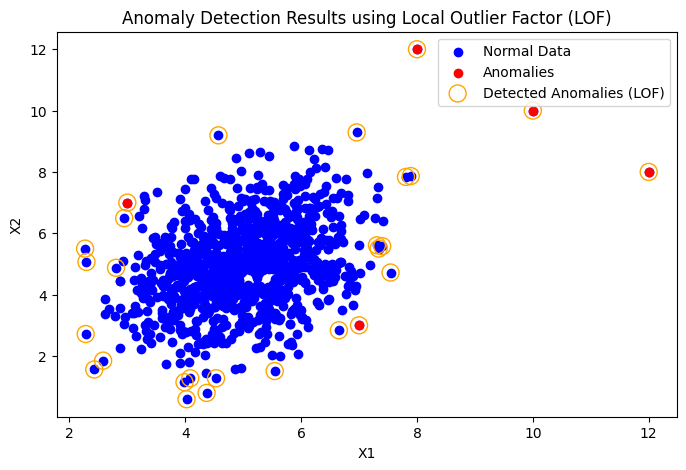

In [7]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate normal data
normal_data = np.random.multivariate_normal(mean=[5, 5], cov=[[1, 0.5], [0.5, 2]], size=1000)

# Generate anomalies
anomalies = np.array([[10, 10], [8, 12], [12, 8], [3, 7], [7, 3]])

# Concatenate normal data and anomalies
data = np.vstack([normal_data, anomalies])

# Fit Local Outlier Factor
lof = LocalOutlierFactor()
lof_scores = lof.fit_predict(data)

# Plot the data along with Local Outlier Factor scores
plt.figure(figsize=(8, 5))

# Plot original data
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies')

# Highlight anomalies detected by LOF
plt.scatter(data[lof_scores == -1, 0], data[lof_scores == -1, 1], edgecolors='orange', facecolors='none', s=150, label='Detected Anomalies (LOF)')

plt.title('Anomaly Detection Results using Local Outlier Factor (LOF)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


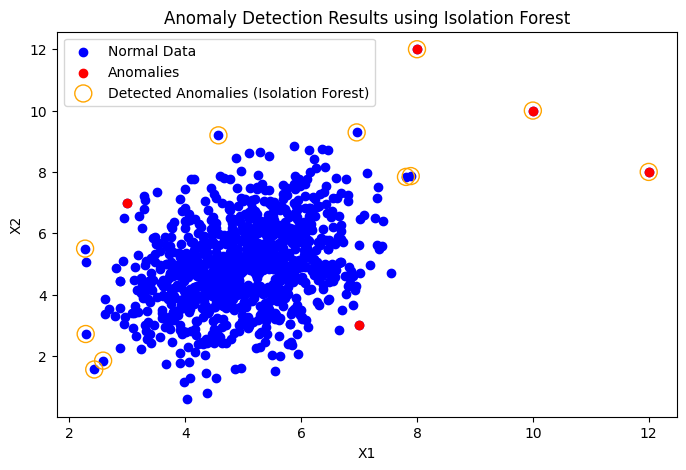

In [8]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate normal data
normal_data = np.random.multivariate_normal(mean=[5, 5], cov=[[1, 0.5], [0.5, 2]], size=1000)

# Generate anomalies
anomalies = np.array([[10, 10], [8, 12], [12, 8], [3, 7], [7, 3]])

# Concatenate normal data and anomalies
data = np.vstack([normal_data, anomalies])

# Fit Isolation Forest
iforest = IsolationForest(contamination=0.01, random_state=0)  # Contamination is the proportion of anomalies
iforest.fit(data)

# Predict outliers
iforest_scores = iforest.predict(data)

# Plot the data along with Isolation Forest outlier predictions
plt.figure(figsize=(8, 5))

# Plot original data
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies')

# Highlight anomalies detected by Isolation Forest
plt.scatter(data[iforest_scores == -1, 0], data[iforest_scores == -1, 1], edgecolors='orange', facecolors='none', s=150, label='Detected Anomalies (Isolation Forest)')

plt.title('Anomaly Detection Results using Isolation Forest')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
